In [51]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import numpy as np

from nn.Module import Sequential, Linear
from nn.Loss import MSE
from nn.Optimizer import Adam


In [52]:
n_samples = 100
n_features = 1
noise = 4
seed = 42

In [53]:
X,y = make_regression(n_samples=n_samples, n_features=n_features,noise=noise,random_state=seed)
np.random.seed(seed)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X.shape, y.shape

((100, 1), (100, 1))

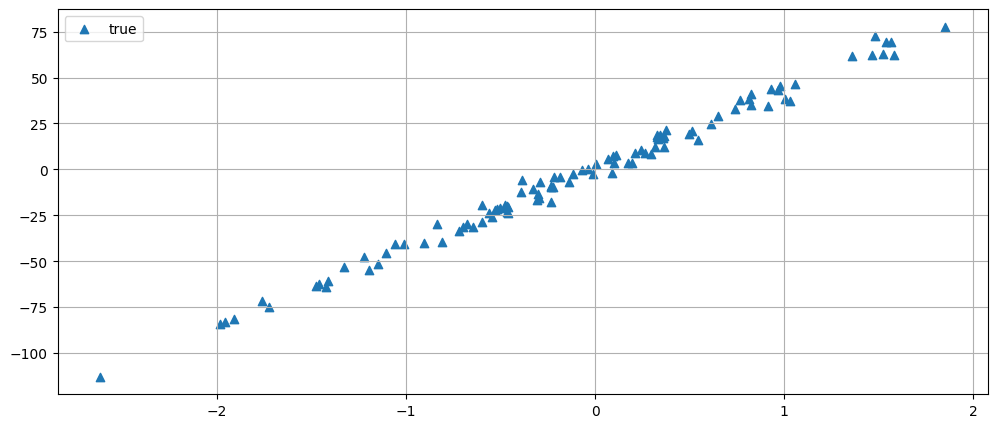

In [54]:
fig = plt.figure(figsize=(12,5))
plt.scatter(X, y,marker="^",alpha=1,label="true")
plt.grid()
plt.legend()
plt.show()

In [55]:
model = Sequential(
    Linear(n_features,4),
    Linear(4,4),
    Linear(4,1)
)

In [56]:
optimizer = Adam(lr=0.01)
loss = MSE()

In [57]:
epochs = 500
loss_values = []
for i in range(epochs):
    model.clear_gradients()
    output = model.forward(X)
    loss_value = loss.forward(output, y)
    loss_values.append(loss_value)
    grad = loss.backward(output, y)
    model.backward(grad)
    model.average_gradients(X.shape[0])
    optimizer.step(model)

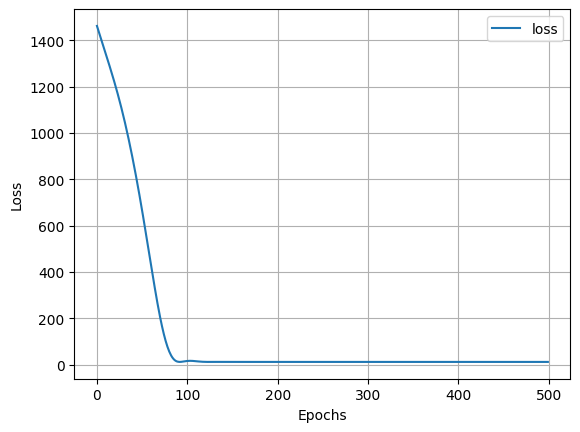

In [58]:
plt.plot(loss_values,label="loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show();

In [59]:
pred = model(X)
pred.shape

(100, 1)

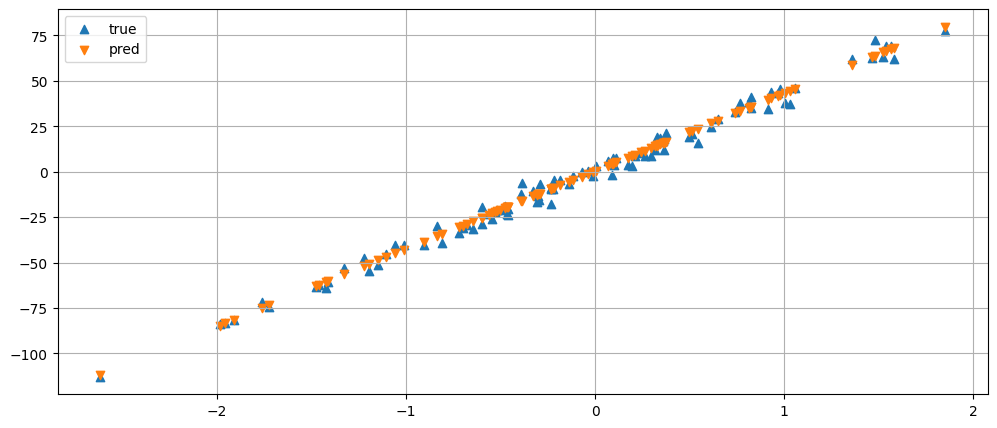

In [60]:
fig = plt.figure(figsize=(12,5))
plt.scatter(X, y,marker="^",alpha=1,label="true")
plt.scatter(X, pred,marker="v",alpha=1,label="pred")
plt.grid()
plt.legend()
plt.show()